<a href="https://colab.research.google.com/github/Shahid0120/pytorch-mini-projects/blob/main/FashionMNIST_FNN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FashionMNIST Multiclass classification using CNN architecture
In this notebook i will using the FashionMNIST dataset which contrains 101'000 images of 101 different food categories!

I will experiment with different Neural Network architectures including FNN,CNN and ResNet

In [96]:
from google.colab import userdata

# Set up repo
password_github = userdata.get('password-github')

!git config --global user.name "Shahid0120"
!git config --global user.email "shahid.hussain0120@gmail.com"
!git config --global user.password password_github

token = userdata.get('github-token')
username = 'Shahid0120'
repo='pytorch-mini-projects'

!git clone https://{token}@github.com/{username}/{repo}

Cloning into 'pytorch-mini-projects'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 156.71 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Importing Data

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Resize

In [15]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 11.7 MB/s eta 0:00:00


In [2]:
# set up test data

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
    ]),
    download=True
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
    ]),
    download=True
)


100%|██████████| 26421880/26421880 [00:14<00:00, 1854698.80it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136318.16it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1559904.47it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5272839.31it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image, label = train_data[0]

image.shape, label

(torch.Size([1, 28, 28]), 9)

# Visualise Images

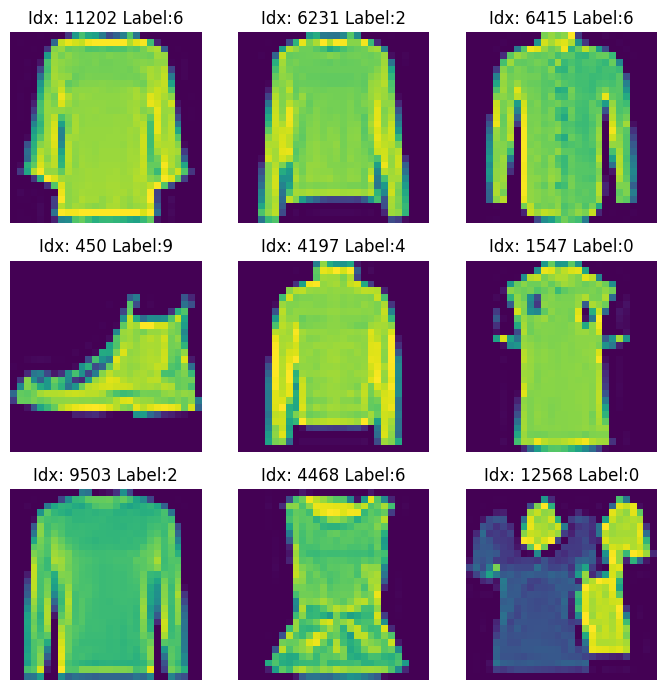

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(7, 7))  # Correct function name is 'plt.subplots'

# Loop through and plot random images
for i in range(9):
    random_number = np.random.randint(low=200, high=20000)

    image, label = train_data[random_number]  # Assuming train_data is defined elsewhere

    # Compute row and column index for the subplot
    row = i // 3
    col = i % 3
    ax[row, col].imshow(np.transpose(image, (1, 2, 0)))
    ax[row, col].set_title(f"Idx: {random_number} Label:{label}")
    ax[row, col].axis(False)
plt.tight_layout()
plt.show()

In [5]:
class_name_index = train_data.class_to_idx
class_name_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# DataLoader + Mini Batches

In [6]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [7]:
BATCH_SIZE = 32
NUM_WORKERS = 0
# train DataLoader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

# test Dataloader
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x789fd0e76860>,
 <torch.utils.data.dataloader.DataLoader at 0x789fd0e750c0>)

In [8]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"For Train Data there is {len(train_dataloader)} in each batch, total of {BATCH_SIZE}")
print(f"For Test Data there is {len(test_dataloader)} in each batch, total of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x789fd0e76860>, <torch.utils.data.dataloader.DataLoader object at 0x789fd0e750c0>)
For Train Data there is 1875 in each batch, total of 32
For Test Data there is 313 in each batch, total of 32


In [9]:
# Checking Sample in DataLoader
train_featues_batch, test_labels_batch = next(iter(train_dataloader))
train_featues_batch.shape, test_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

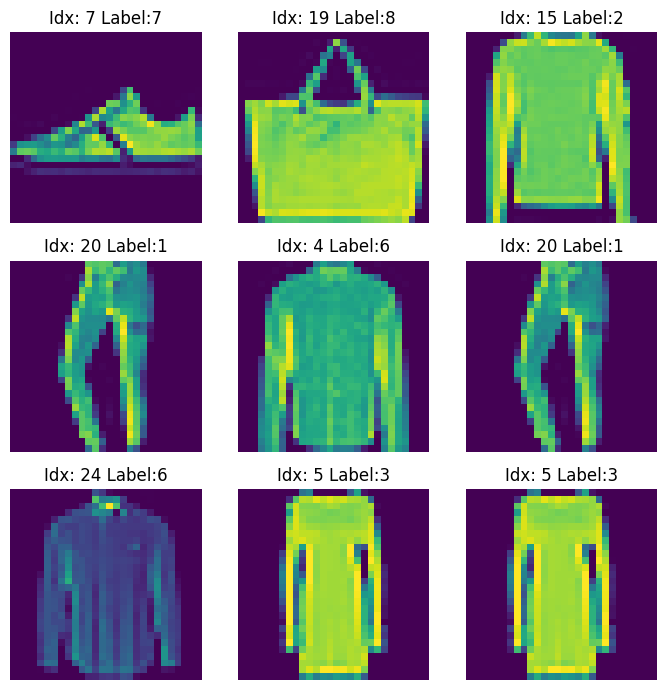

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(7, 7))  # Correct function name is 'plt.subplots'

# Loop through and plot random images
for i in range(9):
    idx = np.random.randint(0, len(train_featues_batch))

    image =  train_featues_batch[idx]  # Assuming train_data is defined elsewhere
    label = test_labels_batch[idx]
    # Compute row and column index for the subplot
    row = i // 3
    col = i % 3
    ax[row, col].imshow(np.transpose(image, (1, 2, 0)))
    ax[row, col].set_title(f"Idx: {idx} Label:{label}")
    ax[row, col].axis(False)
plt.tight_layout()
plt.show()

**Model 0: Baseline Model**

In [11]:
# Flatten input
flatten_image = nn.Flatten()

sample_train_image = train_featues_batch[0]
sample_train_image_flattened = flatten_image(sample_train_image)

print(f"The Sample shape from batch 1 : {sample_train_image.shape}")
print(f"The Sample shape from batch 1 flattended: {sample_train_image_flattened.shape}")



The Sample shape from batch 1 : torch.Size([1, 28, 28])
The Sample shape from batch 1 flattended: torch.Size([1, 784])


# Model 0 - Baseline model

In [12]:
# Build Model 0
class FashionMNISTCNNV1(nn.Module):
  def __init__(self, input_dimension=784, hidden_units=10, output_dimension=10):
    super().__init__()
    self.layers_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_dimension, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=10)
    )

  def forward(self, x):
    return self.layers_stack(x)

# Random seed reproducibility
torch.manual_seed(64)

# Initialize Module
modelV1 = FashionMNISTCNNV1(input_dimension=784, hidden_units=20, output_dimension=len(train_data.classes))
modelV1

FashionMNISTCNNV1(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [16]:
# Test ModelV1 with random tensor
test_tensor = torch.randn(size=(1, 28, 28))
modelV1_test = modelV1(test_tensor)

print(f"The initial shape of tensor was : {test_tensor.shape}")
print(f"After input into model the shape is : {modelV1_test.shape}")
print(f"Output of model is logit : {modelV1_test}")

The initial shape of tensor was : torch.Size([1, 28, 28])
After input into model the shape is : torch.Size([1, 10])
Output of model is logit : tensor([[ 0.1747,  0.2227,  0.0862,  0.5332,  0.0263,  0.1053, -0.1129, -0.0809,
         -0.7109,  0.1440]], grad_fn=<AddmmBackward0>)


In [17]:
import torchmetrics
from torchmetrics import Accuracy
from torch.optim.sgd import SGD

num_classes = len(train_data.classes)

accuracy = Accuracy(task='multiclass', num_classes=int(num_classes))

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = SGD(params=modelV1.parameters(), lr=0.1)

# Creating functions for time experiments

In [18]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device=None):
  """
    Print different between start and end time
  """
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time


# Training Loop


In [19]:
from tqdm.auto import tqdm

# Set seed and timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs (Small for experimentation)
epochs = 10

# Set Start timer
set_start_timer = timer()

# Loop Epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")

  # training loss for each epoch start at zero
  train_loss = 0

  # Enumerate all batches
  for batch, (X,y) in enumerate(train_dataloader):

    # Train model on bacth
    modelV1.train()

    # Foward pass
    y_pred = modelV1(X)

    # Loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimize the zero grad
    optimizer.zero_grad()

    # Backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Average training loss
  train_loss /= len(train_dataloader)

  modelV1.eval()

  test_ac, test_loss = 0, 0

  # Evaluate on test data
  with torch.inference_mode():

    for X,y in test_dataloader:

      # Predict y_test
      test_pred = modelV1(X)

      # Calculate loss
      test_loss += loss_fn(test_pred, y)

      # Calculate accuracy
      accuracy.update(test_pred.argmax(dim=1), y)


    # Average test loss
    test_loss /= len(test_dataloader)

    # Average test ac
    test_ac =  accuracy.compute()
    test_ac = test_ac * 100

  # Print all values after all computation is done!
  print(f"Epoch : {epoch} | Train Loss : {train_loss} | Test Loss : {test_loss} | Test Accuracy : {test_ac}")




set_end_timer = timer()
total_time = print_train_time(start=set_start_timer, end=set_end_timer )


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
Epoch : 0 | Train Loss : 0.5817340016365051 | Test Loss : 0.5036441087722778 | Test Accuracy : 82.34000396728516
Epoch : 1
Epoch : 1 | Train Loss : 0.47531262040138245 | Test Loss : 0.48455801606178284 | Test Accuracy : 82.61499786376953
Epoch : 2
Epoch : 2 | Train Loss : 0.4544387757778168 | Test Loss : 0.4777519404888153 | Test Accuracy : 82.86666870117188
Epoch : 3
Epoch : 3 | Train Loss : 0.44205984473228455 | Test Loss : 0.46294328570365906 | Test Accuracy : 83.05249786376953
Epoch : 4
Epoch : 4 | Train Loss : 0.4354955852031708 | Test Loss : 0.46865829825401306 | Test Accuracy : 83.09000396728516
Epoch : 5
Epoch : 5 | Train Loss : 0.4289843440055847 | Test Loss : 0.45908215641975403 | Test Accuracy : 83.20833587646484
Epoch : 6
Epoch : 6 | Train Loss : 0.42456868290901184 | Test Loss : 0.4875708222389221 | Test Accuracy : 83.22286224365234
Epoch : 7
Epoch : 7 | Train Loss : 0.42252346873283386 | Test Loss : 0.4724216163158417 | Test Accuracy : 83.2437515258789
Epoch : 8

# Make predictions for Model 1 Functions

In [21]:
def evaluate_model(model : torch.nn.Module,
                   dataloader : torch.utils.data.DataLoader,
                   loss_fn : torch.nn.Module,
                   num_classes : np.int32,
                   type_of_classification='multiclass'
                   ):

  """
  Given a model with paramters initialized it evaluate using dataloader
  Paramters:
    - Model
    - Dataloader
    - Loss function
    - num_classes
    - type_of_classification:
      - multiclass
      - multiclassification
      - binary

  Returns:
    - Dictionary
        - Model
        - Loss
        - Accuracy
  """

  loss, ac = 0, 0
  model.eval()
  accuracy = torchmetrics.Accuracy(task=type_of_classification, num_classes=int(num_classes))

  with torch.inference_mode():
    # loop over all batches
    for X,y in tqdm(dataloader):
      # Predict labels
      y_pred = model(X)

      # Computer loss
      loss += loss_fn(y_pred, y)

      # Computer accuracy
      accuracy.update(y_pred.argmax(dim=1), y)

    # Loss average
    loss /= len(dataloader)

    # Accuracy
    acc =  accuracy.compute()
    acc = acc * 100


  return {
      "model": {model.__class__.__name__},
      "Loss": f"{loss.item():.5f}",
      "Accuracy": f"{acc.item():.5f}"
  }

number_classes = len(train_data.classes)

modelV1_results = evaluate_model(model=modelV1, dataloader=test_dataloader,
                                loss_fn=loss_fn,
                                 num_classes=int(number_classes),
                                 type_of_classification='multiclass'
                                 )

modelV1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': {'FashionMNISTCNNV1'}, 'Loss': '0.46245', 'Accuracy': '83.57000'}

# Create Training Loop functions and evaluating Model 1

In [22]:
def train_step(
    model: nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    num_classes: int,
    type_of_classification: str = 'multiclass'):
    """
    Computes one training step

    Packages used:
    - torchmetrics
    - torch
    - tqdm
    """
    train_loss = 0
    accuracy = torchmetrics.Accuracy(task=type_of_classification, num_classes=num_classes)

    for batch, (X, y) in enumerate(train_dataloader):
      # Train model on bacth
      model.train()

      # Forward Prop
      y_pred = model(X)

      # Loss calc
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()  # Accumulate the total loss

      # Accuracy
      accuracy.update(y_pred.argmax(dim=1), y)

      # Zero grad
      optimizer.zero_grad()

      # Loss backward
      loss.backward()

      # Next step
      optimizer.step()

    train_loss /= len(train_dataloader)
    train_acc = accuracy.compute()
    train_acc = train_acc * 100

    print(f"Train Loss : {train_loss:.5f} | Train Accuracy : {train_acc:.2f}%")

def test_step(
    model: nn.Module,
    test_dataloader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    num_classes: int,
    type_of_classification: str = 'multiclass'):
    """
    Computes one testing step

    Packages used:
    - torchmetrics
    - torch
    - tqdm
    """
    test_loss = 0
    accuracy = torchmetrics.Accuracy(task=type_of_classification, num_classes=num_classes)
    model.eval()
    with torch.inference_mode():
      for X, y in test_dataloader:
          test_pred = model(X)

          # Test Loss
          test_loss += loss_fn(test_pred, y)

          # Accuracy
          accuracy.update(test_pred.argmax(dim=1), y)

      test_loss /= len(test_dataloader)  # Average loss of test batches
      test_accuracy = accuracy.compute()
      test_accuracy = test_accuracy * 100

    print(f"Test Loss: {test_loss:.5f} | Test Accuracy : {test_accuracy:.2f}%")


Testing Functions using model_0

In [23]:
torch.manual_seed(42)
num_classes = len(train_data.classes)
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}")
    print("-" * 10)

    # Call train function
    train_step(
        model=modelV1,
        train_dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        num_classes=num_classes,
        type_of_classification='multiclass'
    )

    # Call test function
    test_step(
        model=modelV1,
        test_dataloader=test_dataloader,
        loss_fn=loss_fn,
        num_classes=num_classes,
        type_of_classification='multiclass'
    )



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
----------
Train Loss : 0.41562 | Train Accuracy : 85.33%
Test Loss: 0.45338 | Test Accuracy : 84.13%
Epoch 2
----------
Train Loss : 0.41421 | Train Accuracy : 85.51%
Test Loss: 0.45574 | Test Accuracy : 84.20%
Epoch 3
----------
Train Loss : 0.41154 | Train Accuracy : 85.44%
Test Loss: 0.46094 | Test Accuracy : 84.20%
Epoch 4
----------
Train Loss : 0.40889 | Train Accuracy : 85.65%
Test Loss: 0.45562 | Test Accuracy : 83.84%
Epoch 5
----------
Train Loss : 0.40783 | Train Accuracy : 85.68%
Test Loss: 0.45891 | Test Accuracy : 83.46%


high bias problem to model

# Create ModelV2 with non-linearity - Relu() in first layer and second layer

In [24]:
class FashionMNISTCNNV2(nn.Module):
  def __init__(self, input_dimension: int, hidden_units: int, output_dimension: int):
    super().__init__()
    self.layers_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_dimension, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_dimension),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layers_stack(x)

modelV2 = FashionMNISTCNNV2(input_dimension=784, hidden_units=20, output_dimension=len(train_data.classes))
modelV2

FashionMNISTCNNV2(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): ReLU()
    (3): Linear(in_features=20, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Testing

In [25]:
torch.manual_seed(42)

num_classes = len(train_data.classes)
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}")
    print("-" * 10)

    # Call train function
    train_step(
        model=modelV2,
        train_dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        num_classes=num_classes,
        type_of_classification='multiclass'
    )

    # Call test function
    test_step(
        model=modelV2,
        test_dataloader=test_dataloader,
        loss_fn=loss_fn,
        num_classes=num_classes,
        type_of_classification='multiclass'
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
----------
Train Loss : 2.31371 | Train Accuracy : 9.35%
Test Loss: 2.31378 | Test Accuracy : 9.29%
Epoch 2
----------
Train Loss : 2.31371 | Train Accuracy : 9.35%
Test Loss: 2.31378 | Test Accuracy : 9.29%
Epoch 3
----------
Train Loss : 2.31371 | Train Accuracy : 9.35%
Test Loss: 2.31378 | Test Accuracy : 9.29%
Epoch 4
----------
Train Loss : 2.31371 | Train Accuracy : 9.35%
Test Loss: 2.31378 | Test Accuracy : 9.29%
Epoch 5
----------
Train Loss : 2.31371 | Train Accuracy : 9.35%
Test Loss: 2.31378 | Test Accuracy : 9.29%


# Adding CNN architecture Emulating tinyVGG

class FashionMNISTTinyVGG():
  def __init__():
    super().

In [87]:
import torch
import torch.nn as nn

class FashionMNISTTinyVGG(nn.Module):
    def __init__(self, input_color_channels: int, filters: int, output_shape: int):
        super().__init__()

        # First Convolution Block
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_color_channels, out_channels=filters, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        # Second Convolution Block
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )

        # Classifier Block
        self.classifier_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=filters * 6 * 6, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #print(f"Original shape: {x.shape}")
        x = self.conv_block_1(x)
        #print(f"First Convolution Block: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Second Convolution Block: {x.shape}")
        return self.classifier_block(x)

# Instance of model
num_classes = 10
model_V3 = FashionMNISTTinyVGG(input_color_channels=1, filters=10, output_shape=num_classes)

# Simulation
img_simulation = torch.randn(size=(1, 1, 28, 28))

# Run the model
output = model_V3(img_simulation)
print(f"Output shape: {output.shape}")


Output shape: torch.Size([1, 10])



## Training Loop for CNN - TinyVGG

In [92]:
torch.manual_seed(43)

num_classes = len(train_data.classes)
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_V3.parameters(), lr=0.1)
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}")
    print("-" * 15)

    # Call train function
    train_step(
        model=model_V3,
        train_dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        num_classes=10,
        type_of_classification='multiclass'
    )

    # Call test function
    test_step(
        model=model_V3,
        test_dataloader=test_dataloader,
        loss_fn=loss_fn,
        num_classes=10,
        type_of_classification='multiclass'
    )



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
---------------
Train Loss : 0.38432 | Train Accuracy : 85.97%
Test Loss: 0.39603 | Test Accuracy : 85.88%
Epoch 2
---------------
Train Loss : 0.34466 | Train Accuracy : 87.51%
Test Loss: 0.34152 | Test Accuracy : 87.45%
Epoch 3
---------------
Train Loss : 0.32034 | Train Accuracy : 88.37%
Test Loss: 0.39225 | Test Accuracy : 86.00%
Epoch 4
---------------
Train Loss : 0.30453 | Train Accuracy : 89.01%
Test Loss: 0.32565 | Test Accuracy : 87.85%
Epoch 5
---------------
Train Loss : 0.29201 | Train Accuracy : 89.37%
Test Loss: 0.31570 | Test Accuracy : 88.50%


In [94]:
fig, ax = plt.subplots(3, 3, figsize=(7, 7))  # Correct function name is 'plt.subplots'

# Loop through and plot random images
for i in range(9):
    random_number = np.random.randint(low=200, high=20000)

    image, label = train_data[random_number]  # Assuming train_data is defined elsewhere

    # Compute row and column index for the subplot
    row = i // 3
    col = i % 3
    logit = model_V3(train_data[random_number] )
    pred_y = np.argmax(np.sigmoid(logit), dim=1)

    ax[row, col].imshow(np.transpose(image, (1, 2, 0)))
    ax[row, col].set_title(f"Actual Label:{label}, Predicted Label: {pred_y}")
    ax[row, col].axis(False)
plt.tight_layout()
plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [97]:
!ls

pytorch-mini-projects  sample_data


In [104]:
%cd pytorch-mini-projects

/content/pytorch-mini-projects


In [105]:
%cd CNN/fashionmnist

/content/pytorch-mini-projects/CNN/fashionmnist


In [106]:
!git add .
!git commit -m 'Created 3 model for FashionMNIST classification. First model used on linear layers. Second Model using relu acitivation in a FNN style. Third model created a customer TinyVGG module and scored 89% on test set'
!git push

[main e459051] Created 3 model for FashionMNIST classification. First model used on linear layers. Second Model using relu acitivation in a FNN style. Third model created a customer TinyVGG module and scored 89% on test set
 8 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/t10k-images-idx3-ubyte
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/t10k-labels-idx1-ubyte
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/train-images-idx3-ubyte
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/train-images-idx3-ubyte.gz
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/train-labels-idx1-ubyte
 create mode 100644 CNN/fashionmnist/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Enumerating objects: 16, done.
Counting objects: 100% 